# **AP155 Lab Assignment** 
## Module 6: Partial Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible. 

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Problems 1 and 2 are worth 50 points each).

_Due Date_: **5PM of December 21 (Tue)**


### Student Information 

_Full Name (Last Name, First Name)_: Andeo, Lovely\
_Student No._: 2020-05405\
_Section_: HX4

### Submission Information

_Date and Time Submitted (most recent upload)_: 

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: Lovely Andeo** 

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/50
* Problem 2 - []/50

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_ 

### PROBLEM 1 (50 pts.; 50/50 for code & discussion) 
**The Schrodinger equation and the Crank-Nicolson method**

_Refer to Exercise 9.8 in the Newman text._ In this problem, you will use the Crank-Nicolson method to solve the full time-dependent Schrodinger equation and hence develop a picture of how a wavefunction evolves over time.

Consider an electron (mass $M = 9.109 \times 10^{-31}$ kg) in a box of length $L = 10^{-8}$ m. Suppose that at time $t = 0$ the wavefunction of the electron has the form

$$ \psi(x,0) = \exp\left[-\frac{(x-x_0)^2}{2\sigma^2}\right]e^{i\kappa x},$$
where $x_0 = \frac{L}{2}$, $\sigma = 1 \times 10^{-10}$ m, $\kappa = 5 \times 10^{10} {\rm m}^{-1}$,  and $\psi = 0$ on the walls at $x = 0$ and $x = L$.

1. Perform a single step of the Crank-Nicolson method for this electron, calculating the vector $\psi(t)$ of values of the wavefunction, given the initial wavefunction above and using $N = 1000$ spatial slices with $a = L/N$. Your program will have to perform the following steps. First, given the vector $\psi(0)$ at $t = 0$, you will have to multiply by the matrix $\bf{B}$ to get a vector $\bf{v} = \bf{B}\psi$. Because of the tridiagonal form of $\bf{B}$, this is fairly simple. The $i$th component of $\bf{v}$ is given by
$$ v_i = b_1\psi_i + b_2(\psi_{i+1} + \psi_{i-1}).$$

   You will also have to choose a value for the time-step $h$. A reasonable choice is $h = 10^{-18}$ s. *(15 pts.)*

2. Second you will have to solve the linear system ${\bf Ax}= {\bf v}$ for $\bf{x}$, which gives you the new value of $\psi$. You could do this using a standard linear equation solver like the function $\tt solve$ in numpy's $\tt linalg$. *(10 pts.)*

3. Once you have the code in place to perform a single step of the calculation, extend your program to perform repeated steps and hence solve for $\psi$ at a sequence of times a separation $h$ apart. Note that the matrix $\bf A$ is independent of time, so it doesn't change from one step to another. You can set up the matrix just once and then keep on reusing it for every step. *(15 pts.)*

4. Make an animation of the solution by displaying the real part of the wavefunction at each time-step. You can use the function rate from the package visual to ensure a smooth frame-rate for your animation-- see Section 3.5 on page 117 of the Newman text. 

   Run your animation for a while and describe what you see. Write a few sentences explaining in physics terms what is going on in the system. *(10 pts.)*

**Solution**

In [101]:
import numpy as np
from numpy import zeros, exp, empty, linspace
from banded import banded
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

**3.1**

In [93]:
# Defining the constants and parameters
h = 1e-18
hbar = 1.0546e-34
L = 1e-8
M = 9.109e-31
N = 1000 
a = L/N

# Defining the matrix entries
a1 = 1 + h*hbar/2/M/a**2*1j
a2 = -h*hbar*1j/4/M/a**2
b1 =  1 - h*hbar/2/M/a**2*1j
b2 =  h*hbar*1j/4/M/a**2

# Defining the initial wavefunction
def psi0(x):
	x0 = L/2
	sigma = 1e-10
	k = 5e10
	return exp(-(x-x0)**2/2/sigma**2)*exp(1j*k*x)

# Defining psi
psi = zeros(N+1,complex)
x = linspace(0,L,N+1)
psi[:] = psi0(x)
psi[[0,N]]=0

In [94]:
# Intializing the matrix A
A = empty((3,N),complex)
A[0,:] = a2
A[1,:] = a1
A[2,:] = a2

# Intializing the matrix v
v = b1 * psi[1:N] + b2*psi[2:N+1]+ b2* psi[0:N-1]


**3.2**

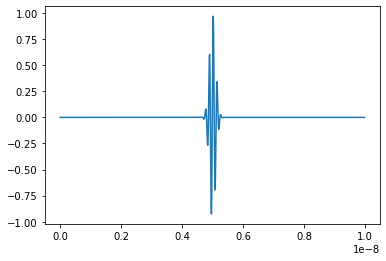

In [95]:
# Using banded to solve for x1
x1 = banded(A,v,1,1)

plt.plot(x[0:999],np.real(x1[0:1000]))
plt.show()

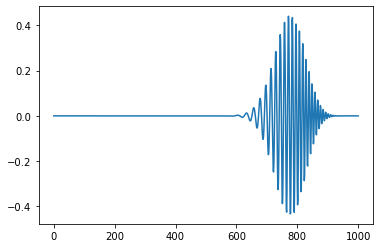

In [96]:
for i in range(500):
    v = b1*psi[1:N] + b2*(psi[2:N+1] + psi[0:N-1])
    psi[1:N] = banded(A,v,1,1)

plt.plot(np.real(psi))

/Users/lovelyandeo/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


AttributeError: 'function' object has no attribute 'FuncAnimation'

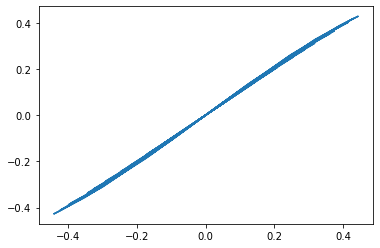

In [104]:
fig, ax = plt.subplots()

x = banded(A,v,1,1)
line = ax.plot(x, np.sin(x))


def animate(i):
    line.set_ydata(np.real(psi))  # update the data
    return line


# Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(np.ma.array(x, mask=True))
    return line,

ani = animate.FuncAnimation(fig, animate, np.arange(1, 200), init_func=init,
                              interval=20, blit=True)
plt.show()

**3.3**

In [97]:
from __future__ import division, print_function
from os import sys
from banded import banded
from pylab import *

h = 1e-18*10
hbar = 1.0546e-36
L = 1e-8
M = 9.109e-31
N = 1000 # Grid slices
a = L/N

a1 = 1 + h*hbar/2/M/a**2*1j
a2 = -h*hbar*1j/4/M/a**2
b1 =  1 - h*hbar/2/M/a**2*1j
b2 =  h*hbar*1j/4/M/a**2

ksi = zeros(N+1,complex)

def ksi0(x):
	x0 = L/2
	sigma = 1e-10
	k = 5e10
	return exp(-(x-x0)**2/2/sigma**2)*exp(1j*k*x)

x = linspace(0,L,N+1)
ksi[:] = ksi0(x)
ksi[[0,N]]=0


A = empty((3,N),complex)

A[0,:] = a2
A[1,:] = a1
A[2:,] = a2

#==============================================================================
# for i in range(100):
# 	v = b1*ksi[1:N] + b2*(ksi[2:N+1] + ksi[0:N-1])
# 	ksi[1:N] = banded(A,v,1,1)
#==============================================================================

#plot(ksi)

#==============================================================================
# Ap = zeros((N-1,N-1),complex)
# for i in range(N-2):
# 	Ap[i,i] = a2
# 	Ap[i+1,i] = a1 #Bottom
# 	Ap[i,i+1] = a1 #Right
# Ap[N-2,N-2] = a2
#==============================================================================


from visual import curve, rate

ksi_c = curve()
ksi_c.set_x(x-L/2)

#ksi = banded(A,v,1,1)
while True:
	rate(30)
	ksi_c.set_y(real(ksi)*1e-9)
	ksi_c.set_z(imag(ksi)*1e-9)	
	for i in range(20):
		v = b1*ksi[1:N] + b2*(ksi[2:N+1] + ksi[0:N-1])
		ksi[1:N] = banded(A,v,1,1)

ModuleNotFoundError: No module named 'visual'

### PROBLEM 2 (50 pts.; 50/50 for code & discussion)

**The Schrodinger equation and the spectral method**

_Refer to Exercise 9.9 in the Newman text._ In this problem, you will use the spectral method to solve the time-dependent Schodinger equation for the same system as in Problem 1, a single particle in one dimension in a box of length $L$ with impenetrable walls. 

To perform the fast transforms needed for this problem, you can use the scipy $\tt fftpack$ package's discrete sine transform $\tt dst$ ([documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.dst.html)) and inverse discrete sine transform $\tt idst$ ([documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.idst.html)). Alternatively, you can use the corresponding functions in the $\tt dcst$ package in Appendix E of the Newman text. 

1. Calculate the values of the coefficients $b_k$ which for convenience can be broken down into their real and imaginary parts as $b_k = \alpha_k + i \eta_k$· Divide the box into $N = 1000$ slices and create two arrays containing the real and imaginary parts of $\psi(x_n,0)$ at each grid point. Perform discrete sine transforms on each array separately and hence calculate the values of the $\alpha_k$ and $\eta_k$ for all $k=1$...$N-1$. *(15 pts.)*

2. Putting $b_k = \alpha_k +i \eta_k$ in the solution above and taking the real part we get $ {\rm Re}\ \psi(x_n, t) $ equals
$$\frac{1}{N} \sum_{k=1}^{N-1} \left[\alpha_k \cos\left(\frac{\pi^2\hbar k^2}{2ML^2}t\right) - \eta_k \sin\left(\frac{\pi^2\hbar k^2}{2ML^2}t\right)\right]\sin\left(\frac{\pi kn}{N}\right)$$
for the real part of the wavefunction. This is an inverse sine transform with coefficients equal to the quantities in the square brackets. 

   Calculate the real part of the wavefunction $\psi(x,t)$ at an arbitrary time $t$ using this formula and the inverse discrete sine transform function. *(10 pts.)* 
   
3. Test your program by making a graph of the wavefunction at time $t = 10^{-16}$ s. *(10 pts.)*

4. Make an animation of the wavefunction over time, similar to that described in part (4) of Problem 1 above. A suitable time interval for each frame of the animation is about $10^{-18}$ s. Run your animation for a while and describe what you see. Write a few sentences explaining in physics terms what is going on in the system. *(15 pts.)*


In [ ]:
h = 2e-18*10
hbar = 1.0546e-36
L = 1e-8
M = 9.109e-31
N = 1000 # Grid slices
a = L/N

In [ ]:
from __future__ import division, print_function
from os import sys
sys.path.append('cpresources')
from pylab import *


h = 2e-18*10
hbar = 1.0546e-36
L = 1e-8
M = 9.109e-31
N = 1000 # Grid slices
a = L/N

def complex_arg(trans):	
	def f(y):
		return trans(real(y)) + 1j*trans(imag(y))

	return f
	
@complex_arg
def dst(y):
    """
	Perform dst transform for real argument
    """
    N = len(y)
    y2 = empty(2*N,float)
    y2[0] = y2[N] = 0.0
    y2[1:N] = y[1:]
    y2[:N:-1] = -y[1:]
    a = -imag(rfft(y2))[:N]
    a[0] = 0.0

    return a


######################################################################
# 1D inverse DST Type-I

@complex_arg
def idst(a):
    N = len(a)
    c = empty(N+1,complex)
    c[0] = c[N] = 0.0
    c[1:N] = -1j*a[1:]
    y = irfft(c)[:N]
    y[0] = 0.0

    return y



ksi = zeros(N+1,complex)

def ksi0(x):
	x0 = L/2
	sigma = 1e-10
	k = 5e10
	return exp(-(x-x0)**2/2/sigma**2)*exp(1j*k*x)

x = linspace(0,L,N+1)
ksi[:] = ksi0(x)
ksi[[0,N]]=0

b0 = dst(ksi)

t = 1e-18
b_ = b0*exp(1j*pi**2*hbar*arange(1,N+2)**2/2/M/L**2*t)

ksi_ = idst(b_)
plot(ksi_)
show()


In [ ]:
from visual import curve, rate

ksi_c = curve()
ksi_c.set_x(x-L/2)

#ksi = banded(A,v,1,1)
t = 0
while True:
	rate(30)
	b_ = b0*exp(1j*pi**2*hbar*arange(1,N+2)**2/2/M/L**2*t)
	ksi_ = idst(b_)
	
	ksi_c.set_y(real(ksi_)*1e-9)
	ksi_c.set_z(imag(ksi_)*1e-9)
	
	t +=h*5

In [ ]:
######################################################################
# 1D DST Type-I

def dst(y):
    N = len(y)
    y2 = empty(2*N,float)
    y2[0] = y2[N] = 0.0
    y2[1:N] = y[1:]
    y2[:N:-1] = -y[1:]
    a = -imag(rfft(y2))[:N]
    a[0] = 0.0

    return a


######################################################################
# 1D inverse DST Type-I

def idst(a):
    N = len(a)
    c = empty(N+1,complex)
    c[0] = c[N] = 0.0
    c[1:N] = -1j*a[1:]
    y = irfft(c)[:N]
    y[0] = 0.0

    return y


Haist
